# Making Maps with Cartoee

```{contents}
:local:
:depth: 2
```

## Introduction

## Technical requirements

```bash
conda create -n gee python
conda activate gee
conda install -c conda-forge mamba
mamba install -c conda-forge geemap pygis
mamba install -c conda-forge cartopy
```

```bash
jupyter lab
```

In [ ]:
# %pip install pygis

In [ ]:
# %pip install cartopy

In [1]:
import ee
import geemap

In [2]:
geemap.ee_initialize()

In [3]:
from geemap import cartoee
import matplotlib.pyplot as plt

## Plotting single-band images

In [4]:
srtm = ee.Image("CGIAR/SRTM90_V4")

# define bounding box [east, south, west, north] to request data
region = [180, -60, -180, 85]
vis = {'min': 0, 'max': 3000}

In [ ]:
fig = plt.figure(figsize=(15, 9))

# 使用cartoee获取地图
ax = cartoee.get_map(srtm, region=region, vis_params=vis)

# 使用我们传递给地图的可视化参数向地图添加颜色条
cartoee.add_colorbar(ax, vis, loc="bottom", label="Elevation (m)", orientation="horizontal")

# 以指定的间隔向地图添加网格线
cartoee.add_gridlines(ax, interval=[60, 30], linestyle=":")

# 使用 cartopy api 添加海岸线
ax.coastlines(color="red")

plt.show()

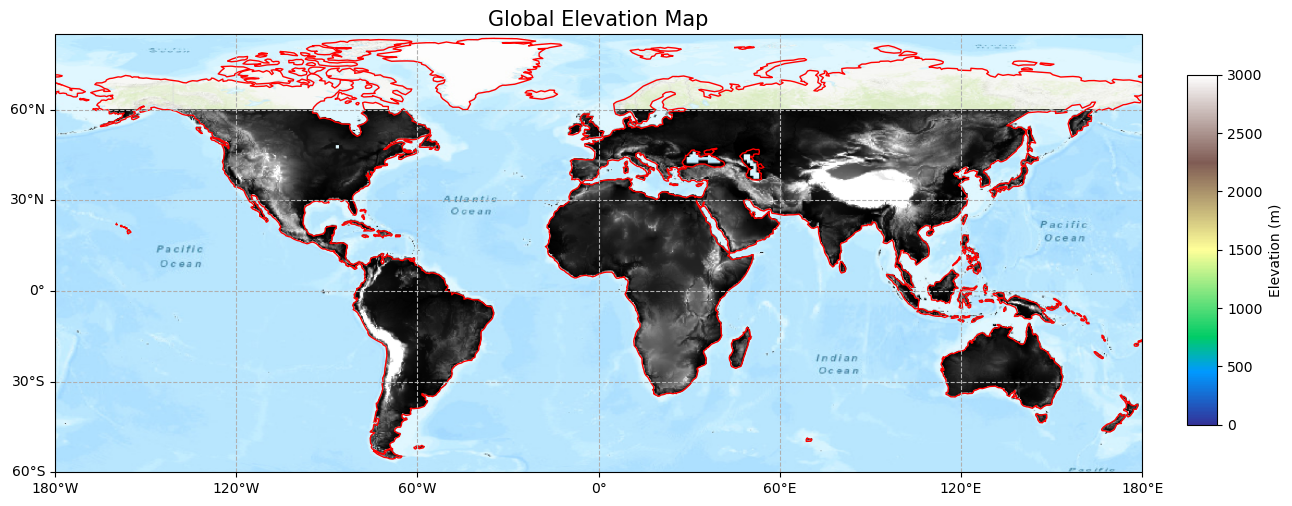

In [5]:
fig = plt.figure(figsize=(15, 7))

cmap = "terrain"

ax = cartoee.get_map(srtm, region=region, vis_params=vis, basemap=cmap)
cartoee.add_colorbar(
    ax, vis, cmap=cmap, loc="right", label="Elevation (m)", orientation="vertical"
)

cartoee.add_gridlines(ax, interval=[60, 30], linestyle="--")
ax.coastlines(color="red")
ax.set_title(label='Global Elevation Map', fontsize=15)

plt.show()

In [ ]:
cartoee.savefig(fig, fname="srtm.jpg", dpi=300, bbox_inches='tight')

## Plotting multi-band images

In [6]:
image = ee.Image('LANDSAT/LC09/C02/T1_L2/LC09_044034_20220503')
vis = {'bands':['SR_B5','SR_B4','SR_B3'],'min':1,'max':30000 }

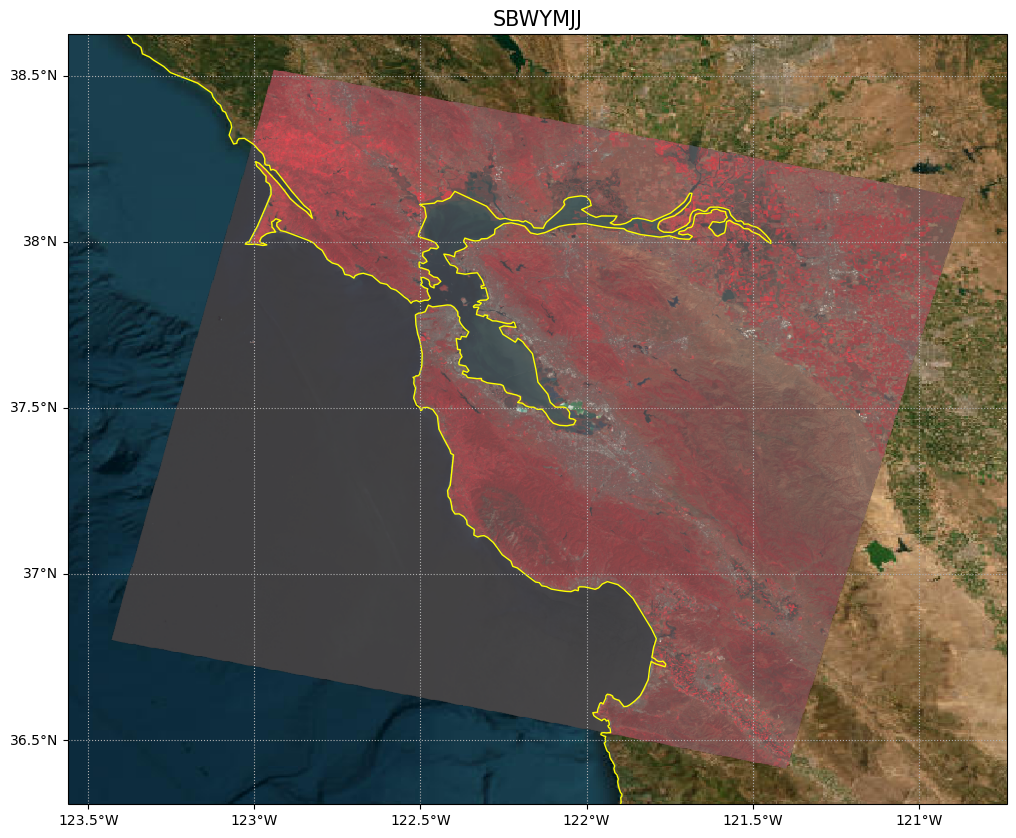

In [10]:
fig = plt.figure(figsize=(15, 10))

ax = cartoee.get_map(image, vis_params=vis,basemap='hybrid',zoom_level=8)
cartoee.pad_view(ax)
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")
ax.coastlines(color="yellow")
ax.set_title(label='SBWYMJJ', fontsize=15)
plt.show()

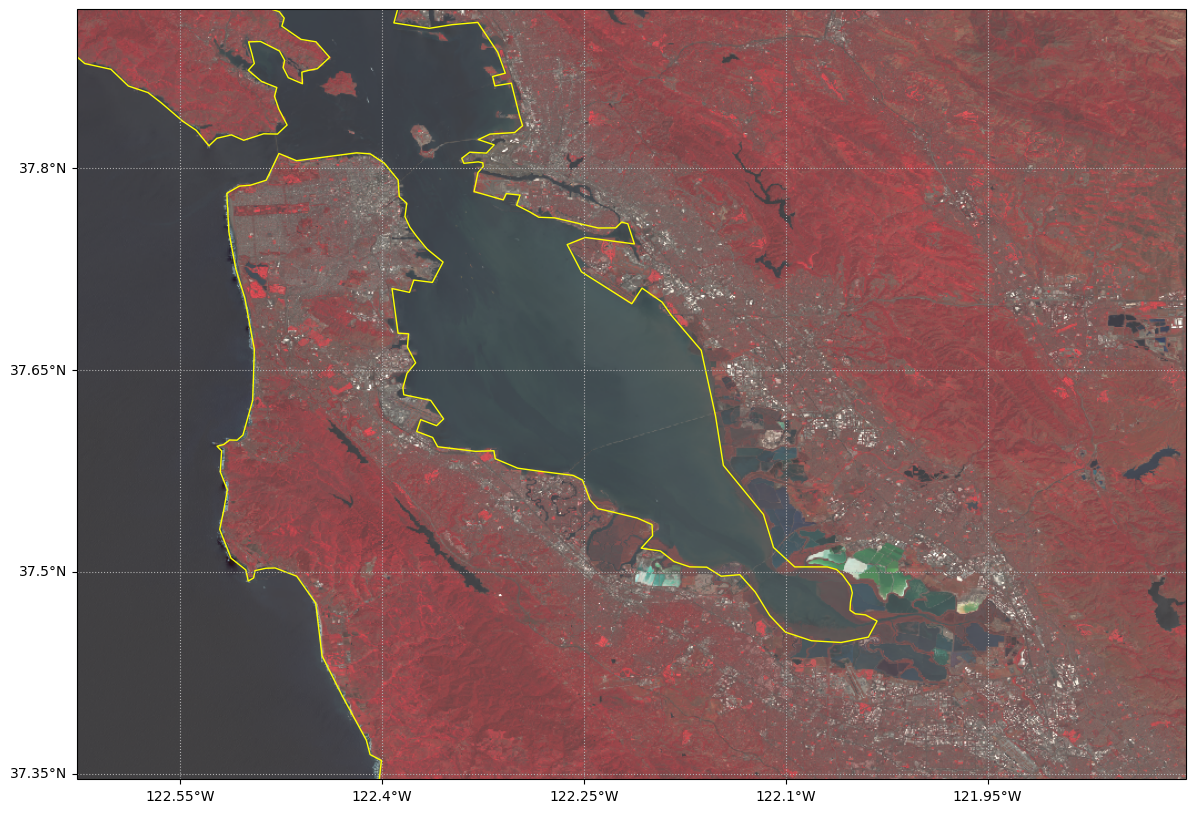

In [9]:
fig = plt.figure(figsize=(15, 10))

region = [-121.8025, 37.3458, -122.6265, 37.9178]#东南西北
ax = cartoee.get_map(image, vis_params=vis, region=region)
cartoee.add_gridlines(ax, interval=0.15, xtick_rotation=0, linestyle=":")
ax.coastlines(color="yellow")

plt.show()

## Adding north arrows and scale bars

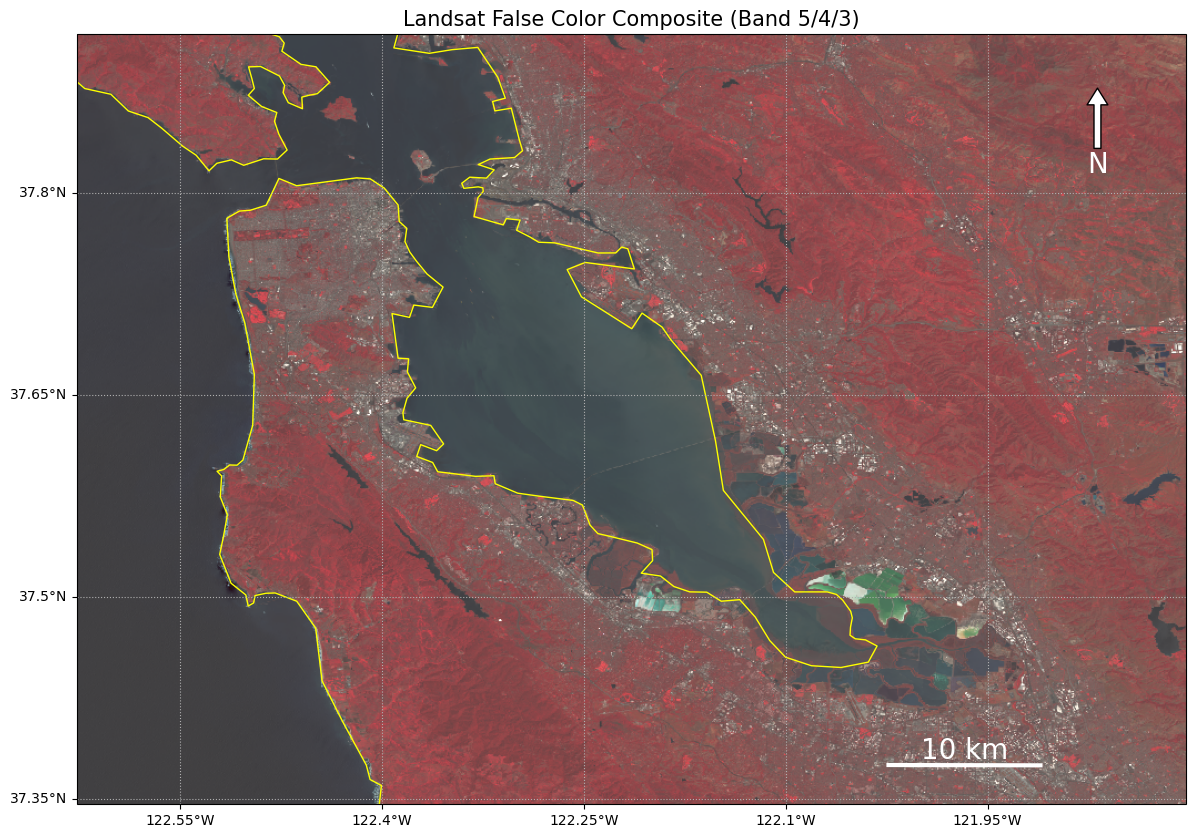

In [11]:
fig = plt.figure(figsize=(15, 10))

region = [-121.8025, 37.3458, -122.6265, 37.9178]
ax = cartoee.get_map(image, vis_params=vis, region=region)
cartoee.add_gridlines(ax, interval=0.15, xtick_rotation=0, linestyle=":")
ax.coastlines(color="yellow")

cartoee.add_north_arrow(#添加指北针
    ax, text="N", xy=(0.92, 0.93), text_color="white", arrow_color="white", fontsize=20
)
cartoee.add_scale_bar_lite(#添加比例尺
    ax, length=10, xy=(0.8, 0.05), fontsize=20, color="white", unit="km"
)
ax.set_title(label='Landsat False Color Composite (Band 5/4/3)', fontsize=15)

plt.show()

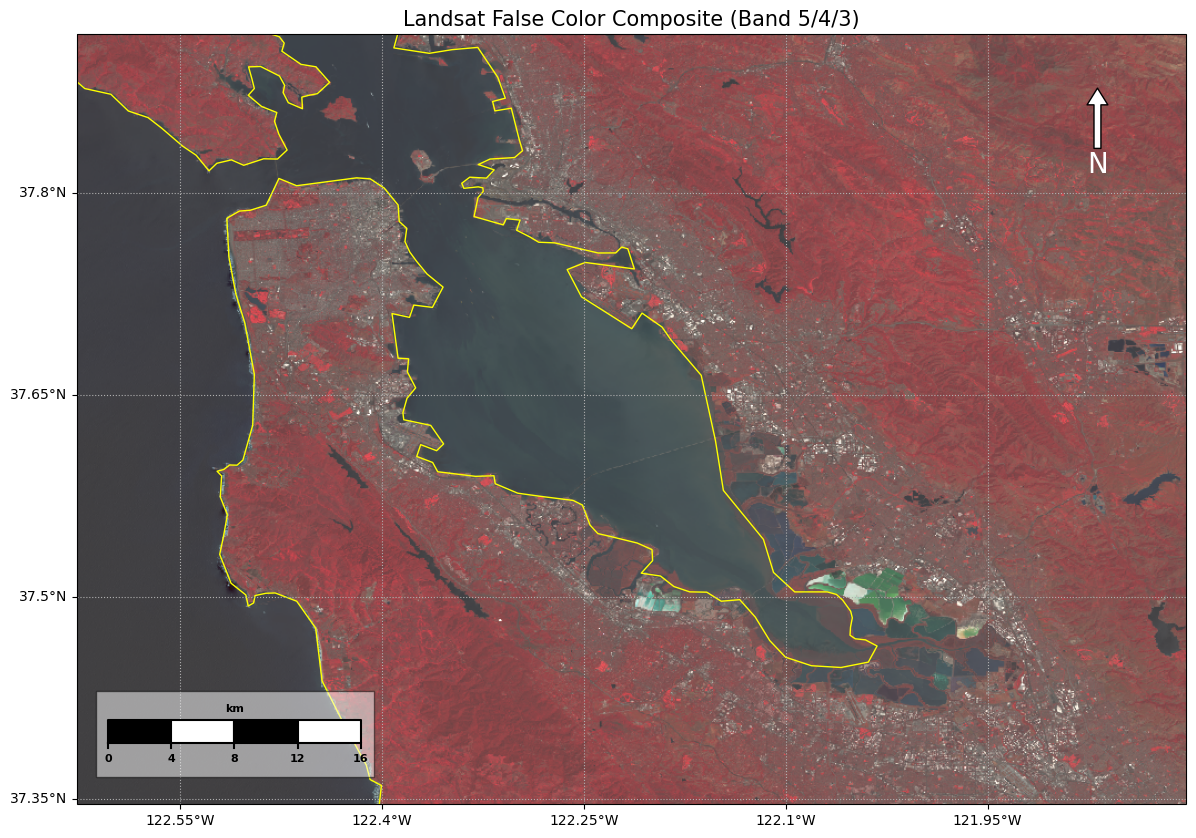

In [13]:
fig = plt.figure(figsize=(15, 10))

region = [-121.8025, 37.3458, -122.6265, 37.9178]
ax = cartoee.get_map(image, vis_params=vis, region=region)
cartoee.add_gridlines(ax, interval=0.15, xtick_rotation=0, linestyle=":")
ax.coastlines(color="yellow")

# 添加指北针
north_arrow_dict = {
    "text": "N",
    "xy": (0.92, 0.93),
    "arrow_length": 0.10,
    "text_color": "white",
    "arrow_color": "white",
    "fontsize": 20,
    "width": 5,
    "headwidth": 15,
    "ha": "center",
    "va": "center",
}
cartoee.add_north_arrow(ax, **north_arrow_dict)

# 添加比例尺
scale_bar_dict = {
    'metric_distance': 4,
    'unit': "km",
    'at_x': (0.03, 0.15),
    'at_y': (0.08, 0.11),
    'max_stripes': 4,
    'ytick_label_margins': 0.25,
    'fontsize': 8,
    'font_weight': "bold",
    'rotation': 0,
    'zorder': 999,
    'paddings': {"xmin": 0.05, "xmax": 0.05, "ymin": 1.5, "ymax": 0.5},
}

cartoee.add_scale_bar(ax, **scale_bar_dict)
ax.set_title(label='Landsat False Color Composite (Band 5/4/3)', fontsize=15)

plt.show()


In [ ]:
cartoee.savefig(fig, fname="landsat.jpg")

## Adding legends

In [14]:
fuels = [
    'Coal',
    'Oil',
    'Gas',
    'Hydro',
    'Nuclear',
    'Solar',
    'Waste',
    'Wind',
    'Geothermal',
    'Biomass',
]

fc = ee.FeatureCollection("WRI/GPPD/power_plants").filter(
    ee.Filter.inList('fuel1', fuels)
)

colors = [
    '000000',
    '593704',
    'BC80BD',
    '0565A6',
    'E31A1C',
    'FF7F00',
    '6A3D9A',
    '5CA2D1',
    'FDBF6F',
    '229A00',
]

styled_fc = geemap.ee_vector_style(fc, column="fuel1", labels=fuels, color=colors, pointSize=1)

In [15]:
Map = geemap.Map()
Map.addLayer(styled_fc, {}, 'Power Plants')
Map.add_legend(title="Power Plant Fuel Type", labels=fuels, colors=colors)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [16]:
from matplotlib.lines import Line2D

In [17]:
legend = []

for index, fuel in enumerate(fuels):
    item = Line2D(
                    [],
                    [],
                    marker="o",
                    color='#' + colors[index],
                    label=fuel,
                    markerfacecolor='#' + colors[index],
                    markersize=5,
                    ls="",
                )
    legend.append(item)

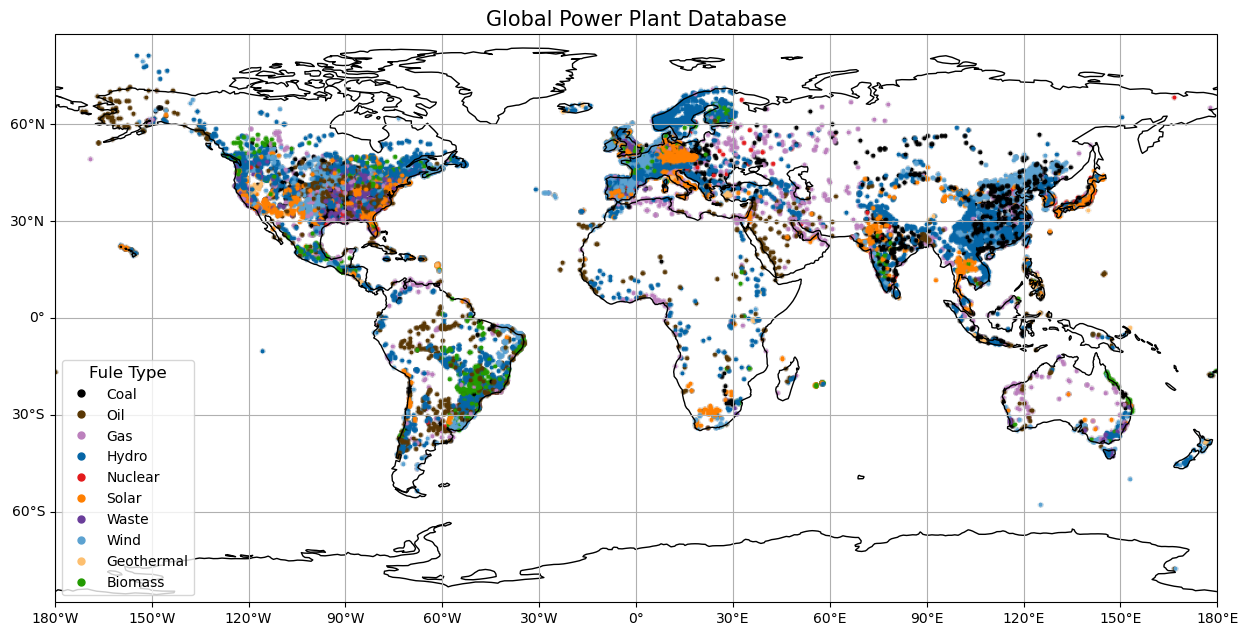

In [20]:
fig = plt.figure(figsize=(15, 10))

bbox = [180, -88, -180, 88]
ax = cartoee.get_map(styled_fc, region=bbox)
ax.set_title(label='Global Power Plant Database', fontsize=15)
cartoee.add_gridlines(ax, interval=30)
cartoee.add_legend(ax, legend_elements=legend, font_size=10, title='Fule Type', title_fontize=12, loc='lower left')
ax.coastlines(color="black")

plt.show()

In [ ]:
cartoee.savefig(fig, 'ch08_power_plants.jpg', dpi=150)

## Adding basemaps

In [ ]:
image = ee.Image('LANDSAT/LC09/C02/T1_L2/LC09_044034_20220503')
vis = {"bands": ['SR_B5', 'SR_B4', 'SR_B3'], "min": 0, "max": 30000, "gamma": 1.3}

fig = plt.figure(figsize=(15, 10))
ax = cartoee.get_map(image, vis_params=vis, basemap='roadmap', zoom_level=8)
cartoee.pad_view(ax)
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")
ax.coastlines(color="yellow")

plt.show()

In [ ]:
import cartopy.io.img_tiles as cimgt

In [ ]:
#该方法未授权，不用
#basemap = cimgt.Stamen('terrain-background')不支持了
basemap = cimgt.StadiaMapsTiles('stamen_terrain')
fig = plt.figure(figsize=(15, 10))

ax = cartoee.get_map(image, vis_params=vis, basemap=basemap, zoom_level=8)#zoom_level越高，底图越详细，标注越小
cartoee.pad_view(ax)
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")
ax.coastlines(color="yellow")

plt.show()

In [ ]:
basemap = cimgt.OSM()

fig = plt.figure(figsize=(15, 10))
ax = cartoee.get_map(image, vis_params=vis, basemap=basemap, zoom_level=8)
cartoee.pad_view(ax)
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")
ax.coastlines(color="yellow")

plt.show()

## Using custom projections

### The PlateCarree projection

In [ ]:
ocean = (
    ee.ImageCollection('NASA/OCEANDATA/MODIS-Terra/L3SMI')
    .filter(ee.Filter.date('2018-01-01', '2018-03-01'))
    .median()
    .select(["sst"], ["SST"])
)

In [ ]:
visualization = {'bands': "SST", 'min': -2, 'max': 30}
bbox = [180, -88, -180, 88]

In [ ]:
fig = plt.figure(figsize=(15, 10))

ax = cartoee.get_map(ocean, cmap='plasma', vis_params=visualization, region=bbox)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma')

ax.set_title(label='Sea Surface Temperature', fontsize=15)

ax.coastlines()
plt.show()

In [ ]:
cartoee.savefig(fig, 'SST.jpg', dpi=300)

### Custom projections

In [ ]:
import cartopy.crs as ccrs

In [ ]:
fig = plt.figure(figsize=(15, 10))

projection = ccrs.Mollweide(central_longitude=-180)
ax = cartoee.get_map(
    ocean, vis_params=visualization, region=bbox, cmap='plasma', proj=projection
)
cb = cartoee.add_colorbar(
    ax, vis_params=visualization, loc='bottom', cmap='plasma', orientation='horizontal'
)
ax.set_title("Mollweide projection")
ax.coastlines()

plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 10))

projection = ccrs.Robinson(central_longitude=-180)
ax = cartoee.get_map(
    ocean, vis_params=visualization, region=bbox, cmap='plasma', proj=projection
)
cb = cartoee.add_colorbar(
    ax, vis_params=visualization, loc='bottom', cmap='plasma', orientation='horizontal'
)
ax.set_title("Robinson projection")
ax.coastlines()

plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 10))

projection = ccrs.InterruptedGoodeHomolosine(central_longitude=-180)
ax = cartoee.get_map(
    ocean, vis_params=visualization, region=bbox, cmap='plasma', proj=projection
)
cb = cartoee.add_colorbar(
    ax, vis_params=visualization, loc='bottom', cmap='plasma', orientation='horizontal'
)
ax.set_title("Goode homolosine projection")
ax.coastlines()

plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 10))

projection = ccrs.EqualEarth(central_longitude=-180)
ax = cartoee.get_map(
    ocean, vis_params=visualization, region=bbox, cmap='plasma', proj=projection
)
cb = cartoee.add_colorbar(
    ax, vis_params=visualization, loc='right', cmap='plasma', orientation='vertical'
)
ax.set_title("Equal Earth projection")
ax.coastlines()

plt.show()

In [ ]:
fig = plt.figure(figsize=(11, 10))

projection = ccrs.Orthographic(-130, -10)
ax = cartoee.get_map(
    ocean, vis_params=visualization, region=bbox, cmap='plasma', proj=projection
)
cb = cartoee.add_colorbar(
    ax, vis_params=visualization, loc='right', cmap='plasma', orientation='vertical'
)
ax.set_title("Orographic projection")
ax.coastlines()

plt.show()

### The warping artifacts

In [ ]:
fig = plt.figure(figsize=(11, 10))

spole = [180, -88, -180, 0]
projection = ccrs.SouthPolarStereo()

ax = cartoee.get_map(
    ocean, cmap='plasma', vis_params=visualization, region=spole, proj=projection
)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma')
ax.coastlines()
ax.set_title('The South Pole')

plt.show()

In [ ]:
fig = plt.figure(figsize=(11, 10))

ax = cartoee.get_map(
    ocean, cmap='plasma', vis_params=visualization, region=spole, proj=projection
)
cb = cartoee.add_colorbar(ax, vis_params=visualization, loc='right', cmap='plasma')
ax.coastlines()
ax.set_title('The South Pole')

# get bounding box coordinates of a zoom area
zoom = spole
zoom[-1] = -20

# convert bbox coordinate from [W,S,E,N] to [W,E,S,N] as matplotlib expects
zoom_extent = cartoee.bbox_to_extent(zoom)

# set the extent of the map to the zoom area
ax.set_extent(zoom_extent, ccrs.PlateCarree())

plt.show()

## Plotting multiple Earth Engine layers

### Creating a blended image

In [ ]:
Map = geemap.Map()

image = (
    ee.ImageCollection('MODIS/MCD43A4_006_NDVI')
    .filter(ee.Filter.date('2022-05-01', '2022-06-01'))
    .select("NDVI")
    .first()
)

vis_params = {'min': 0.0, 'max': 1.0, 'palette': 'ndvi'}
Map.setCenter(-7.03125, 31.0529339857, 2)
Map.addLayer(image, vis_params, 'MODIS NDVI')

countries = ee.FeatureCollection(geemap.examples.get_ee_path('countries'))
style = {"color": "00000088", "width": 1, "fillColor": "00000000"}
Map.addLayer(countries.style(**style), {}, "Countries")

ndvi = image.visualize(**vis_params)
blend = ndvi.blend(countries.style(**style))

Map.addLayer(blend, {}, "Blend")
Map

### Plotting a blended image with the default projection

In [ ]:
fig = plt.figure(figsize=(15, 10))

bbox = [180, -88, -180, 88]
ax = cartoee.get_map(blend, region=bbox)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc='right')
ax.set_title(label='MODIS NDVI (May 2022)', fontsize=15)

plt.show()

### Plotting a blended image with a custom projection

In [ ]:
import cartopy.crs as ccrs

In [ ]:
fig = plt.figure(figsize=(15, 10))

projection = ccrs.EqualEarth(central_longitude=0)
ax = cartoee.get_map(blend, region=bbox, proj=projection)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc='right')
ax.set_title(label='MODIS NDVI (May 2022)', fontsize=15)

plt.show()

## Creating timelapse animations

### Creating an ImageCollection

In [ ]:
lon = -115.1585
lat = 36.1500
start_year = 1984
end_year = 2011

point = ee.Geometry.Point(lon, lat)
years = ee.List.sequence(start_year, end_year)

def get_best_image(year):

    start_date = ee.Date.fromYMD(year, 1, 1)
    end_date = ee.Date.fromYMD(year, 12, 31)
    image = (
        ee.ImageCollection("LANDSAT/LT05/C02/T1_L2")
        .filterBounds(point)
        .filterDate(start_date, end_date)
        .sort("CLOUD_COVER")
        .first()
    )
    image = (
        image.select('SR_B.')
        .multiply(0.0000275)
        .add(-0.2)
        .set({'system:time_start': image.get('system:time_start')}))
    return ee.Image(image)

collection = ee.ImageCollection(years.map(get_best_image))

### Displaying a sample image

In [ ]:
Map = geemap.Map()

vis_params = {"bands": ['SR_B5', 'SR_B4', 'SR_B3'], "min": 0, "max": 0.5}
image = ee.Image(collection.first())
Map.addLayer(image, vis_params, 'First image')
Map.setCenter(lon, lat, 8)

Map

### Getting a sample output image

In [ ]:
w = 0.4
h = 0.3
region = [lon + w, lat - h, lon - w, lat + h]

fig = plt.figure(figsize=(10, 8))

ax = cartoee.get_map(image, region=region, vis_params=vis_params)
cartoee.add_gridlines(ax, interval=[0.2, 0.2], linestyle=":")

# add north arrow
north_arrow_dict = {
    "text": "N",
    "xy": (0.1, 0.3),
    "arrow_length": 0.15,
    "text_color": "white",
    "arrow_color": "white",
    "fontsize": 20,
    "width": 5,
    "headwidth": 15,
    "ha": "center",
    "va": "center",
}
cartoee.add_north_arrow(ax, **north_arrow_dict)

# add scale bar
scale_bar_dict = {
    "length": 10,
    "xy": (0.1, 0.05),
    "linewidth": 3,
    "fontsize": 20,
    "color": "white",
    "unit": "km",
    "ha": "center",
    "va": "bottom",
}
cartoee.add_scale_bar_lite(ax, **scale_bar_dict)
ax.set_title(label='Las Vegas, NV', fontsize=15)

plt.show()

### Creating timelapse

In [ ]:
cartoee.get_image_collection_gif(
    ee_ic=collection,
    out_dir='timelapse',
    out_gif="animation.gif",
    vis_params=vis_params,
    region=region,
    fps=5,
    mp4=True,
    grid_interval=(0.2, 0.2),
    plot_title="Las Vegas, NV - ",
    date_format='YYYY',
    fig_size=(10, 8),
    dpi_plot=100,
    file_format="jpg",
    north_arrow_dict=north_arrow_dict,
    scale_bar_dict=scale_bar_dict,
    verbose=True,
)
geemap.show_image('timelapse/animation.gif')

## Summary

### 绘制单波段图
1 设置地图大小fig = plt.figure(figsize=(15, 9))
2 将img导入地图，并设置底图ax = cartoee.get_map(img, region=region, vis_params=vis, basemap=cmap)
3 添加图例颜色条cartoee.add_colorbar()
4 添加经纬网cartoee.add_gridlines(ax, interval=[60, 30], linestyle="--")
5 （可选）标注海岸线ax.coastlines(color="red")
6 设置图名ax.set_title(label='Global Elevation Map', fontsize=15)

### 绘制多波段图
1 设置地图大小fig = plt.figure(figsize=(15, 10))
2 将img导入地图，并设置底图ax = cartoee.get_map(image, vis_params=vis,basemap='hybrid',zoom_level=8)
3 设置按照img大小冗余一点空间的情况显示地图（不设range的情况下）cartoee.pad_view(ax)
4 添加经纬网cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=0, linestyle=":")
5 （可选）标注海岸线ax.coastlines(color="yellow")

### 设置指北针
两个方法
1 直接在函数中添加参数，如下：
cartoee.add_north_arrow(ax, text="N", xy=(0.92, 0.93), text_color="white", arrow_color="white", fontsize=20)
2 先设置属性字典，在调用函数
north_arrow_dict = {}
cartoee.add_north_arrow(ax, **north_arrow_dict)


### 设置比例尺
两个函数
1 直接在函数中添加参数，如下：
cartoee.add_scale_bar_lite(ax, length=10, xy=(0.8, 0.05), fontsize=20, color="white", unit="km")
2 先设置属性字典，在调用函数，注意与第一个方法函数不同，该方法可操作性更强：
scale_bar_dict = {}
cartoee.add_scale_bar(ax, **scale_bar_dict)

### 添加图例
cartoee.add_legend(ax, legend_elements=legend, font_size=10, title='Fule Type', title_fontize=12, loc='lower left')